# Banking77 Dataset Exploration

This notebook contains exploratory data analysis (EDA) for the Banking77 dataset.


In [19]:
import sys
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from data.load_data import load_banking77
from data.label_mapping import get_label_mappings

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


## Load the Dataset


In [20]:
# Load datasets
train, validation, test = load_banking77()


## Exploratory Data Analysis


### Basic Dataset Statistics


In [21]:
# Basic statistics
print("Dataset Overview:")
print(f"Training samples: {len(train):,}")
print(f"Validation samples: {len(validation):,}")
print(f"Test samples: {len(test):,}")
print(f"Total samples: {len(train) + len(validation) + len(test):,}")

# Get label mappings
id_to_label, label_to_id = get_label_mappings(train)
print(f"\nNumber of classes: {len(id_to_label)}")

# Display first few examples
print("\n" + "="*60)
print("Sample Examples:")
print("="*60)
for i in range(3):
    example = train[i]
    label_id = example['label']
    intent_name = id_to_label[label_id]
    print(f"\nExample {i+1}:")
    print(f"  Text: {example['text']}")
    print(f"  Label ID: {label_id}")
    print(f"  Intent: {intent_name}")


Dataset Overview:
Training samples: 8,002
Validation samples: 2,001
Test samples: 3,080
Total samples: 13,083

Number of classes: 77

Sample Examples:

Example 1:
  Text: If I bought something I didn't like, can I get a refund?
  Label ID: 52
  Intent: 52

Example 2:
  Text: If I'm getting my identity verified, what all do I need?
  Label ID: 69
  Intent: 69

Example 3:
  Text: My top-up was rejected by an app.
  Label ID: 59
  Intent: 59


### Class Distribution Analysis


In [22]:
# Count class frequencies in each split
train_labels = train['label']
val_labels = validation['label']
test_labels = test['label']

train_counts = Counter(train_labels)
val_counts = Counter(val_labels)
test_counts = Counter(test_labels)

# Create DataFrame for analysis
# Use label IDs (0-76) for counting, but store intent names for display
label_df = pd.DataFrame({
    'label_id': list(id_to_label.keys()),
    'intent': list(id_to_label.values()),
    'train_count': [train_counts.get(label_id, 0) for label_id in id_to_label.keys()],
    'val_count': [val_counts.get(label_id, 0) for label_id in id_to_label.keys()],
    'test_count': [test_counts.get(label_id, 0) for label_id in id_to_label.keys()]
})

label_df['total_count'] = label_df['train_count'] + label_df['val_count'] + label_df['test_count']
label_df = label_df.sort_values('total_count', ascending=False)

print("Class Distribution Statistics:")
print(f"Mean samples per class: {label_df['total_count'].mean():.2f}")
print(f"Median samples per class: {label_df['total_count'].median():.2f}")
print(f"Std samples per class: {label_df['total_count'].std():.2f}")
print(f"Min samples per class: {label_df['total_count'].min()}")
print(f"Max samples per class: {label_df['total_count'].max()}")
print(f"\nClass balance ratio (min/max): {label_df['total_count'].min() / label_df['total_count'].max():.3f}")


Class Distribution Statistics:
Mean samples per class: 169.91
Median samples per class: 167.00
Std samples per class: 32.94
Min samples per class: 75
Max samples per class: 227

Class balance ratio (min/max): 0.330


C:\Users\1juli\AppData\Local\Temp\ipykernel_30728\2228797826.py:42: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax4.boxplot(split_data, labels=['Train', 'Validation', 'Test'], patch_artist=True)


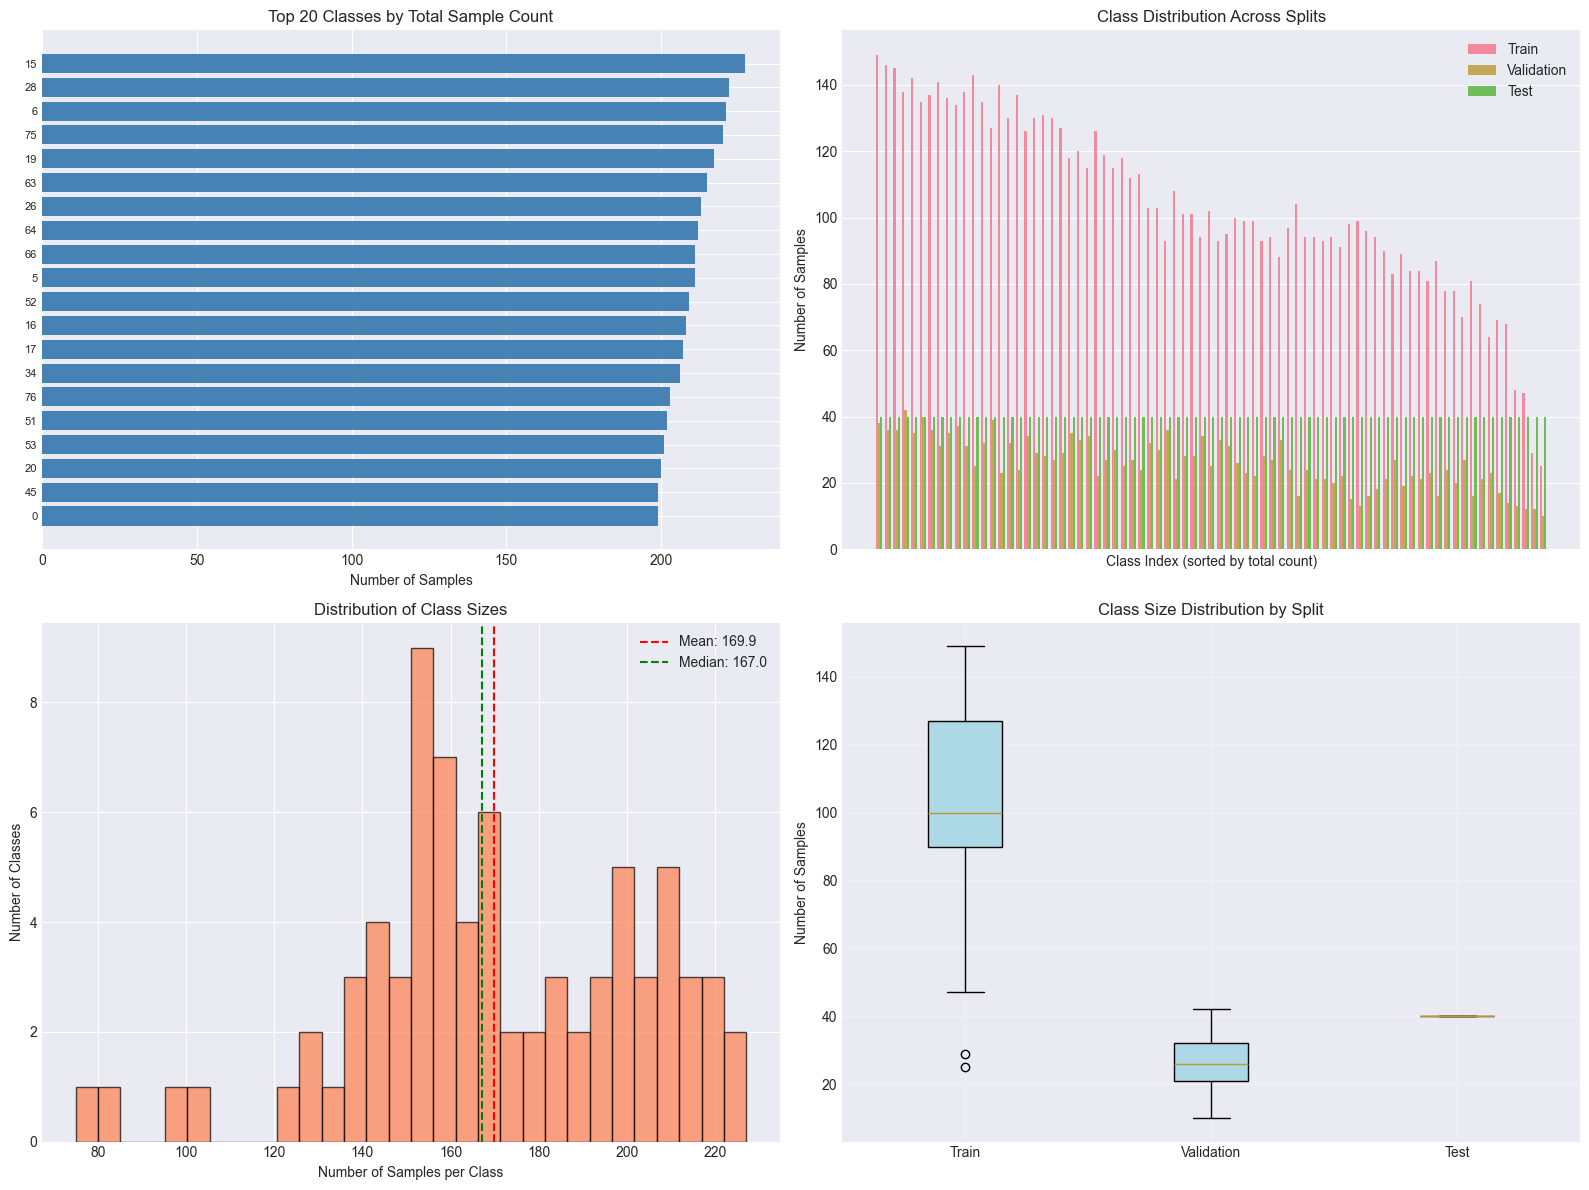

In [23]:
# Plot class distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Overall class distribution (top 20)
ax1 = axes[0, 0]
top_20 = label_df.head(20)
ax1.barh(range(len(top_20)), top_20['total_count'], color='steelblue')
ax1.set_yticks(range(len(top_20)))
ax1.set_yticklabels(top_20['intent'], fontsize=8)
ax1.set_xlabel('Number of Samples')
ax1.set_title('Top 20 Classes by Total Sample Count')
ax1.invert_yaxis()

# 2. Distribution across splits
ax2 = axes[0, 1]
x = np.arange(len(label_df))
width = 0.25
ax2.bar(x - width, label_df['train_count'], width, label='Train', alpha=0.8)
ax2.bar(x, label_df['val_count'], width, label='Validation', alpha=0.8)
ax2.bar(x + width, label_df['test_count'], width, label='Test', alpha=0.8)
ax2.set_xlabel('Class Index (sorted by total count)')
ax2.set_ylabel('Number of Samples')
ax2.set_title('Class Distribution Across Splits')
ax2.legend()
ax2.set_xticks([])  # Hide x-axis labels for readability

# 3. Histogram of class sizes
ax3 = axes[1, 0]
ax3.hist(label_df['total_count'], bins=30, edgecolor='black', alpha=0.7, color='coral')
ax3.set_xlabel('Number of Samples per Class')
ax3.set_ylabel('Number of Classes')
ax3.set_title('Distribution of Class Sizes')
ax3.axvline(label_df['total_count'].mean(), color='red', linestyle='--', 
            label=f'Mean: {label_df["total_count"].mean():.1f}')
ax3.axvline(label_df['total_count'].median(), color='green', linestyle='--', 
            label=f'Median: {label_df["total_count"].median():.1f}')
ax3.legend()

# 4. Box plot of class sizes by split
ax4 = axes[1, 1]
split_data = [label_df['train_count'], label_df['val_count'], label_df['test_count']]
bp = ax4.boxplot(split_data, labels=['Train', 'Validation', 'Test'], patch_artist=True)
for patch in bp['boxes']:
    patch.set_facecolor('lightblue')
ax4.set_ylabel('Number of Samples')
ax4.set_title('Class Size Distribution by Split')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### Class Balance Analysis


In [24]:
# Check if classes are balanced
train_expected = len(train) / len(id_to_label)
val_expected = len(validation) / len(id_to_label)
test_expected = len(test) / len(id_to_label)

print("Class Balance Analysis:")
print(f"Expected samples per class (train): {train_expected:.2f}")
print(f"Expected samples per class (validation): {val_expected:.2f}")
print(f"Expected samples per class (test): {test_expected:.2f}")

# Calculate coefficient of variation (CV) - measure of balance
# CV = std / mean, lower is more balanced
train_cv = label_df['train_count'].std() / label_df['train_count'].mean()
val_cv = label_df['val_count'].std() / label_df['val_count'].mean()
test_cv = label_df['test_count'].std() / label_df['test_count'].mean()

print(f"\nCoefficient of Variation (lower = more balanced):")
print(f"Train CV: {train_cv:.3f}")
print(f"Validation CV: {val_cv:.3f}")
print(f"Test CV: {test_cv:.3f}")

# Identify imbalanced classes
threshold = 0.5  # Classes with < 50% of expected samples
imbalanced_train = label_df[label_df['train_count'] < train_expected * threshold]
imbalanced_val = label_df[label_df['val_count'] < val_expected * threshold]
imbalanced_test = label_df[label_df['test_count'] < test_expected * threshold]

print(f"\nUnderrepresented classes (< 50% of expected):")
print(f"Train: {len(imbalanced_train)} classes")
print(f"Validation: {len(imbalanced_val)} classes")
print(f"Test: {len(imbalanced_test)} classes")

if len(imbalanced_train) > 0:
    print("\nMost underrepresented classes in training:")
    print(imbalanced_train[['intent', 'train_count']].head(10))


Class Balance Analysis:
Expected samples per class (train): 103.92
Expected samples per class (validation): 25.99
Expected samples per class (test): 40.00

Coefficient of Variation (lower = more balanced):
Train CV: 0.262
Validation CV: 0.290
Test CV: 0.000

Underrepresented classes (< 50% of expected):
Train: 4 classes
Validation: 3 classes
Test: 0 classes

Most underrepresented classes in training:
    intent  train_count
18      18           48
10      10           47
72      72           29
23      23           25


### Text Length Analysis


In [25]:
# Analyze text lengths
train_lengths = [len(text.split()) for text in train['text']]
val_lengths = [len(text.split()) for text in validation['text']]
test_lengths = [len(text.split()) for text in test['text']]

length_df = pd.DataFrame({
    'split': ['train'] * len(train_lengths) + ['validation'] * len(val_lengths) + ['test'] * len(test_lengths),
    'word_count': train_lengths + val_lengths + test_lengths
})

print("Text Length Statistics (word count):")
print(f"\nTraining set:")
print(f"  Mean: {np.mean(train_lengths):.2f} words")
print(f"  Median: {np.median(train_lengths):.2f} words")
print(f"  Std: {np.std(train_lengths):.2f} words")
print(f"  Min: {np.min(train_lengths)} words")
print(f"  Max: {np.max(train_lengths)} words")

print(f"\nValidation set:")
print(f"  Mean: {np.mean(val_lengths):.2f} words")
print(f"  Median: {np.median(val_lengths):.2f} words")
print(f"  Std: {np.std(val_lengths):.2f} words")
print(f"  Min: {np.min(val_lengths)} words")
print(f"  Max: {np.max(val_lengths)} words")

print(f"\nTest set:")
print(f"  Mean: {np.mean(test_lengths):.2f} words")
print(f"  Median: {np.median(test_lengths):.2f} words")
print(f"  Std: {np.std(test_lengths):.2f} words")
print(f"  Min: {np.min(test_lengths)} words")
print(f"  Max: {np.max(test_lengths)} words")


Text Length Statistics (word count):

Training set:
  Mean: 11.98 words
  Median: 10.00 words
  Std: 7.91 words
  Min: 2 words
  Max: 79 words

Validation set:
  Mean: 11.82 words
  Median: 10.00 words
  Std: 7.80 words
  Min: 3 words
  Max: 75 words

Test set:
  Mean: 10.95 words
  Median: 9.00 words
  Std: 6.69 words
  Min: 2 words
  Max: 69 words


C:\Users\1juli\AppData\Local\Temp\ipykernel_30728\1164948273.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax2.boxplot([train_lengths, val_lengths, test_lengths],
C:\Users\1juli\AppData\Local\Temp\ipykernel_30728\1164948273.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=length_df, x='split', y='word_count', ax=ax3, palette='Set2')


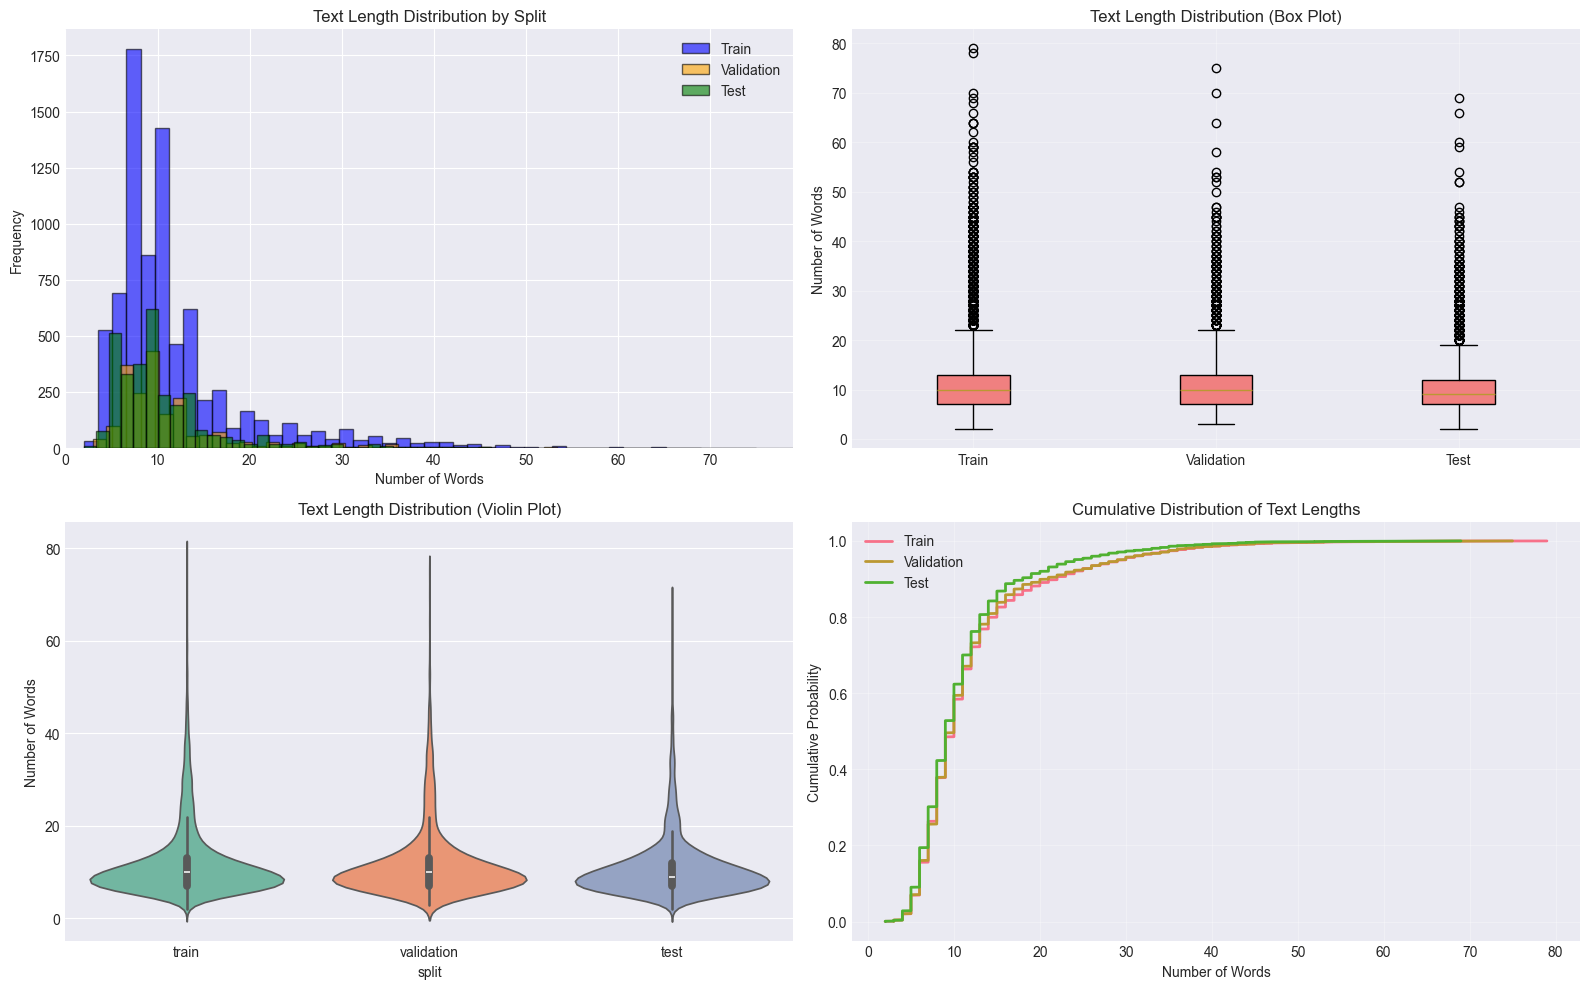

In [26]:
# Visualize text length distributions
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Histogram of text lengths by split
ax1 = axes[0, 0]
ax1.hist(train_lengths, bins=50, alpha=0.6, label='Train', color='blue', edgecolor='black')
ax1.hist(val_lengths, bins=50, alpha=0.6, label='Validation', color='orange', edgecolor='black')
ax1.hist(test_lengths, bins=50, alpha=0.6, label='Test', color='green', edgecolor='black')
ax1.set_xlabel('Number of Words')
ax1.set_ylabel('Frequency')
ax1.set_title('Text Length Distribution by Split')
ax1.legend()
ax1.set_xlim(0, min(100, max(max(train_lengths), max(val_lengths), max(test_lengths))))

# 2. Box plot of text lengths
ax2 = axes[0, 1]
bp = ax2.boxplot([train_lengths, val_lengths, test_lengths], 
                 labels=['Train', 'Validation', 'Test'], patch_artist=True)
for patch in bp['boxes']:
    patch.set_facecolor('lightcoral')
ax2.set_ylabel('Number of Words')
ax2.set_title('Text Length Distribution (Box Plot)')
ax2.grid(True, alpha=0.3)

# 3. Violin plot
ax3 = axes[1, 0]
sns.violinplot(data=length_df, x='split', y='word_count', ax=ax3, palette='Set2')
ax3.set_ylabel('Number of Words')
ax3.set_title('Text Length Distribution (Violin Plot)')

# 4. Cumulative distribution
ax4 = axes[1, 1]
for split_name, lengths in [('Train', train_lengths), ('Validation', val_lengths), ('Test', test_lengths)]:
    sorted_lengths = np.sort(lengths)
    cumulative = np.arange(1, len(sorted_lengths) + 1) / len(sorted_lengths)
    ax4.plot(sorted_lengths, cumulative, label=split_name, linewidth=2)
ax4.set_xlabel('Number of Words')
ax4.set_ylabel('Cumulative Probability')
ax4.set_title('Cumulative Distribution of Text Lengths')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### Examples by Class


In [27]:
# Show examples from different classes
print("Sample Examples from Different Classes:")
print("="*70)

# Get a few examples from different classes (using label IDs)
sample_label_ids = label_df.head(10)['label_id'].tolist()  # Top 10 classes
sample_label_ids.extend(label_df.tail(5)['label_id'].tolist())  # Bottom 5 classes

for label_id in sample_label_ids[:8]:  # Show first 8
    examples = [ex for ex in train if ex['label'] == label_id]
    if examples:
        intent_name = id_to_label[label_id]
        print(f"\nIntent: {intent_name} (ID: {label_id})")
        print(f"  Example: {examples[0]['text']}")
        if len(examples) > 1:
            print(f"  Another: {examples[1]['text']}")


Sample Examples from Different Classes:

Intent: 15 (ID: 15)
  Example: There was an extra fee when I paid with my card, why was i charged this extra fee?
  Another: Why am I charged a fee when using my debit or credit card?

Intent: 28 (ID: 28)
  Example: There's a weird payment showing in my app that I definitely haven't made myself, as I haven't used the card at all that day. Please cancel that and return my money.
  Another: There is a direct debit fee in the App that I didn't do.

Intent: 6 (ID: 6)
  Example: What's going on with my balance? Shouldn't it be a bit higher since I deposited a cheque a day ago?
  Another: I deposited a check yesterday to up my account balance, but that deposit hasn't shown up yet.  It's been a day already!

Intent: 75 (ID: 75)
  Example: The app is showing that I received alot more money than I actually received from the ATM. This occurred earlier today.
  Another: Who should I contact if the amount of my withdrawal doesn't correspond to the amount th

### Summary Statistics Table


In [28]:
# Create a comprehensive summary table
summary_data = {
    'Split': ['Train', 'Validation', 'Test', 'Total'],
    'Samples': [len(train), len(validation), len(test), len(train) + len(validation) + len(test)],
    'Classes': [len(set(train['label'])), len(set(validation['label'])), 
                len(set(test['label'])), len(id_to_label)],
    'Mean Words': [np.mean(train_lengths), np.mean(val_lengths), 
                   np.mean(test_lengths), np.mean(train_lengths + val_lengths + test_lengths)],
    'Median Words': [np.median(train_lengths), np.median(val_lengths), 
                     np.median(test_lengths), np.median(train_lengths + val_lengths + test_lengths)],
    'Min Words': [np.min(train_lengths), np.min(val_lengths), 
                  np.min(test_lengths), min(min(train_lengths), min(val_lengths), min(test_lengths))],
    'Max Words': [np.max(train_lengths), np.max(val_lengths), 
                  np.max(test_lengths), max(max(train_lengths), max(val_lengths), max(test_lengths))]
}

summary_df = pd.DataFrame(summary_data)
print("Dataset Summary:")
print(summary_df.to_string(index=False))


Dataset Summary:
     Split  Samples  Classes  Mean Words  Median Words  Min Words  Max Words
     Train     8002       77   11.982629          10.0          2         79
Validation     2001       77   11.816592          10.0          3         75
      Test     3080       77   10.952597           9.0          2         69
     Total    13083       77   11.714744          10.0          2         79
